### Importing Libraries

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

### Importing Datasets

To do this, we will create a dictionary with the first 3 characters of the month names and the corresponding month number.

For each dataset file, we will import the file and create a column in the dataset with the month and year of each entry.

In [ ]:
months = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

base_path = pathlib.Path('dataset')

base = []

for archive in base_path.iterdir():
    month_name = archive.name[:3]
    month = months[month_name]

    year = archive.name[-8:]
    year = int(year.replace('.csv', ''))

    df = pd.read_csv(base_path / archive.name)
    df['year'] = year
    df['month'] = month
    base.append(df)

    base_airbnb = pd.concat(base)

### Now let's start the data treatment

- Since we have many columns, our model might end up being very slow.
- Additionally, a quick analysis shows that several columns are not necessary for our prediction model, so we will remove some columns from our dataset.
- Types of columns we will exclude:
    1. IDs, links, and information not relevant to the model
    2. Repeated or extremely similar columns (that provide the same information to the model, e.g., Date vs. Year/Month)
    3. Columns filled with free text -> We won’t run any word analysis or anything similar
    4. Columns where all or almost all values are the same
    
- To do this, we will perform a qualitative analysis, reviewing the columns and identifying which are unnecessary.

In [3]:
print(list(base_airbnb.columns))
base_airbnb.head(5)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

id                         listing_url       scrape_id last_scraped  \
0  14063  https://www.airbnb.com/rooms/14063  20180414160018   2018-04-14   
1  17878  https://www.airbnb.com/rooms/17878  20180414160018   2018-04-14   
2  24480  https://www.airbnb.com/rooms/24480  20180414160018   2018-04-14   
3  25026  https://www.airbnb.com/rooms/25026  20180414160018   2018-04-14   
4  31560  https://www.airbnb.com/rooms/31560  20180414160018   2018-04-14   

                                        name  \
0                       Living in a Postcard   
1          Very Nice 2Br - Copacabana - WiFi   
2           Nice and cozy near Ipanema Beach   
3  Beautiful Modern Decorated Studio in Copa   
4           NICE & COZY 1BDR - IPANEMA BEACH   

                                             summary  \
0  Besides the most iconic's view, our apartment ...   
1  Please note that special rates apply for New Y...   
2  My studio is located in the best  of Ipanema. ...   
3  Our apartment is a little gem, everyone loves ...   
4  This nice and clean 1 bedroom apartment is loc...   

                                               space  \
0                                                NaN   
1  - large balcony which looks out on pedestrian ...   
2  The studio is located at Vinicius de Moraes St...   
3  This newly renovated studio (last renovations ...   
4  This nice and clean 1 bedroom apartment is loc...   

                                         description experiences_offered  \
0  Besides the most iconic's view, our apartment ...                none   
1  Please note that special rates apply for New Y...                none   
2  My studio is located in the best  of Ipanema. ...                none   
3  Our apartment is a little gem, everyone loves ...                none   
4  This nice and clean 1 bedroom apartment is loc...                none   

                               neighborhood_overview  ...  \
0  Best and favorite neighborhood of Rio. Perfect...  ...   
1  This is the best spot in Rio. Everything happe...  ...   
2  The beach, the lagoon, Ipanema is a great loca...  ...   
3  Copacabana is a lively neighborhood and the ap...  ...   
4  Die Nachbarschaft von Ipanema ist super lebend...  ...   

  minimum_minimum_nights maximum_minimum_nights minimum_maximum_nights  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

  maximum_maximum_nights minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                    NaN                    NaN                     NaN   
1                    NaN                    NaN                     NaN   
2                    NaN                    NaN                     NaN   
3                    NaN                    NaN                     NaN   
4                    NaN                    NaN                     NaN   

   number_of_reviews_ltm calculated_host_listings_count_entire_homes  \
0                    NaN                                         NaN   
1                    NaN                                         NaN   
2                    NaN                                         NaN   
3                    NaN                                         NaN   
4                    NaN                                         NaN   

   calculated_host_listings_count_private_rooms  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   calculated_host_listings_count_shared_rooms  
0                                          NaN  
1                     

### After the qualitative analysis of the columns, considering the criteria explained above, we are left with the following columns:
- Note that we previously had 108 columns, we reduced it to "only" 34.


In [4]:
columns = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','year','month']

base_airbnb = base_airbnb.loc[:, columns]
print(list(base_airbnb.columns))
display(base_airbnb.head(5))

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'year', 'month']


host_response_time host_response_rate host_is_superhost  \
0                NaN                NaN                 f   
1     within an hour               100%                 t   
2     within an hour               100%                 f   
3     within an hour               100%                 f   
4     within an hour               100%                 t   

   host_listings_count   latitude  longitude property_type        room_type  \
0                  1.0 -22.946854 -43.182737     Apartment  Entire home/apt   
1                  2.0 -22.965919 -43.178962   Condominium  Entire home/apt   
2                  1.0 -22.985698 -43.201935     Apartment  Entire home/apt   
3                  3.0 -22.977117 -43.190454     Apartment  Entire home/apt   
4                  1.0 -22.983024 -43.214270     Apartment  Entire home/apt   

   accommodates  bathrooms  ...  review_scores_cleanliness  \
0             4        1.0  ...                        9.0   
1             5        1.0  ...                        9.0   
2             2        1.0  ...                       10.0   
3             3        1.0  ...                       10.0   
4             3        1.0  ...                       10.0   

   review_scores_checkin review_scores_communication review_scores_location  \
0                    9.0                         9.0                    9.0   
1                   10.0                        10.0                    9.0   
2                   10.0                        10.0                   10.0   
3                   10.0                        10.0                   10.0   
4                   10.0                        10.0                   10.0   

  review_scores_value instant_bookable is_business_travel_ready  \
0                 9.0                f                        f   
1                 9.0                t                        f   
2                 9.0                f                        f   
3                 9.0                f                        f   
4                 9.0                t                        f   

           cancellation_policy  year  month  
0  strict_14_with_grace_period  2018      4  
1                       strict  2018      4  
2                       strict  2018      4  
3                       strict  2018      4  
4                       strict  2018      4  

[5 rows x 34 columns]

In [5]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902210 entries, 0 to 34328
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_response_time           500367 non-null  object 
 1   host_response_rate           500364 non-null  object 
 2   host_is_superhost            901750 non-null  object 
 3   host_listings_count          901750 non-null  float64
 4   latitude                     902210 non-null  float64
 5   longitude                    902210 non-null  float64
 6   property_type                902210 non-null  object 
 7   room_type                    902210 non-null  object 
 8   accommodates                 902210 non-null  int64  
 9   bathrooms                    900486 non-null  float64
 10  bedrooms                     901360 non-null  float64
 11  beds                         899708 non-null  float64
 12  bed_type                     902210 non-null  object 
 13  ameni

### Treating Missing Values

- By visualizing the data, we noticed a significant disparity in missing data. Columns with more than 300,000 NaN values are going to be excluded from the analysis.
- For the other columns, since we have a large amount of data (over 900,000 rows), we will exclude the rows that contain NaN values.

In [6]:
for column in base_airbnb:
    if base_airbnb[column].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(column, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
year                           0
month                          0
dtype: int64


- Now let's remove the empty rows.

In [7]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
year                        0
month                       0
dtype: int64


### Check Data Types in Each Column

- We need to do this because sometimes Python reads a column as text when it should be a number, so we need to correct it.

In [8]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

- Since "price" and "extra people" are being recognized as objects (instead of floats), we need to change the data type of these columns.

In [9]:
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)
#checking the types
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object


### Exploratory Analysis and Handling Outliers

- We will basically examine each feature to:
    1. See the correlation between features and decide whether we will keep all the features we have.
    2. Exclude outliers (we will use the rule of values below Q1 - 1.5 * IQR and values above Q3 + 1.5 * IQR, where IQR = Q3 - Q1).
    3. Confirm whether all the features we have are truly relevant for our model or if any of them will not be helpful and should be excluded.
    
- We will start with the columns for price (our desired final result) and extra_people (also a monetary value). These are the continuous numerical values.

- Next, we will analyze the columns with discrete numerical values (accommodates, bedrooms, guests_included, etc.).

- Finally, we will evaluate the text columns and determine which categories make sense to keep or not.

Example of analysis: If the goal is to help price a property you are looking to list, excluding outliers in host_listings_count might make sense. However, if you are a company with a series of properties and want to compare with other similar companies and position yourself accordingly, excluding those with more than 6 properties might remove valuable insights from your model. Always consider your objective.

<Axes: >

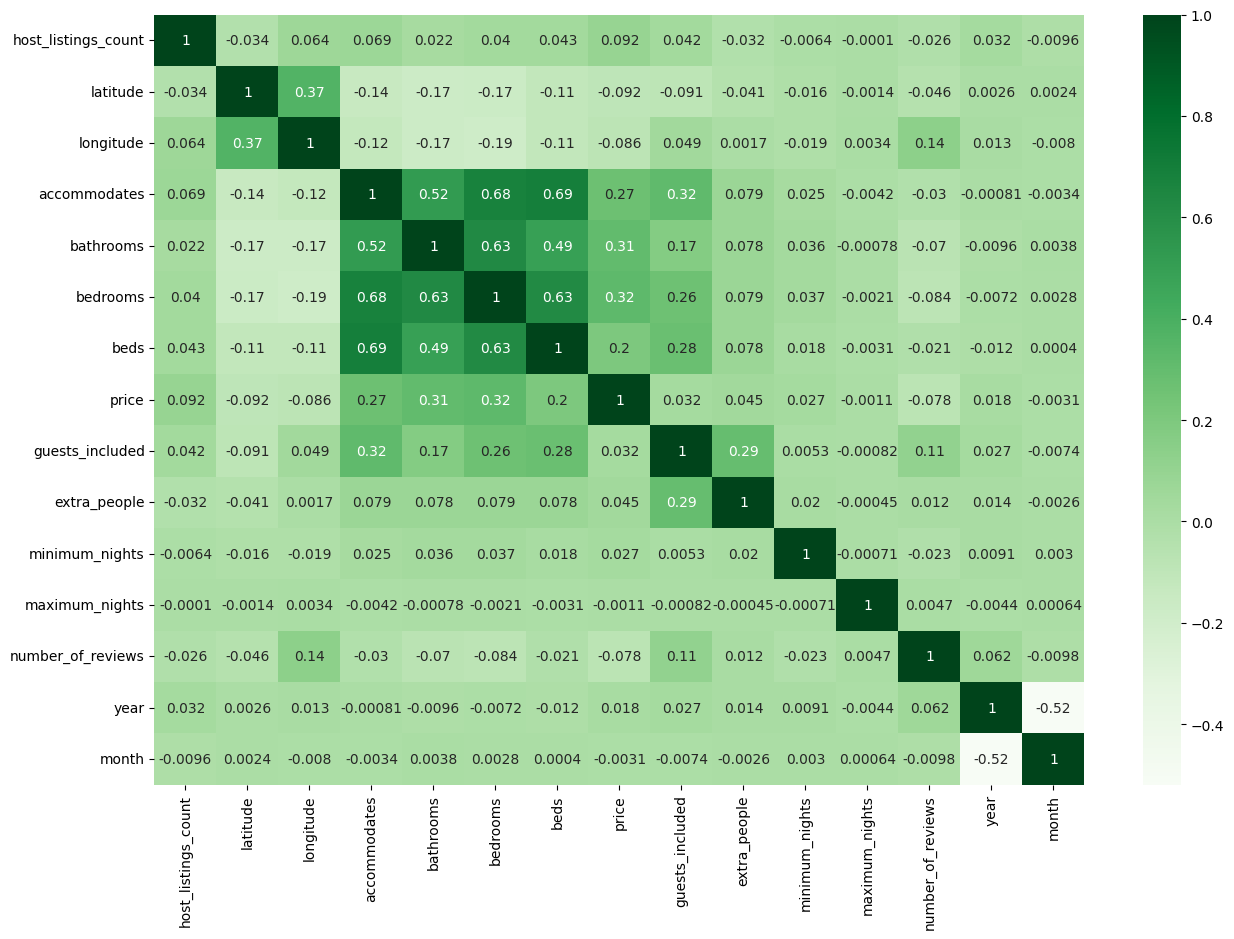

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(numeric_only=True), annot=True, cmap='Greens')

### Defining Functions for Outlier Analysis

We will define some functions to assist in the analysis of outliers in the columns.

In [11]:
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def exclude_outliers(df, name_column):
    number_rows = df.shape[0]
    lim_inf, lim_sup = limits(df[name_column])
    df = df.loc[(df[name_column] >= lim_inf) & (df[name_column] <= lim_sup), :]
    removed_rows = number_rows - df.shape[0]
    return df,  removed_rows

In [12]:
def box_diagram(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limits(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histogram(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def bar_plot(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limits(coluna))

## price

C:\Users\gabri\AppData\Local\Temp\ipykernel_14132\3249714847.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


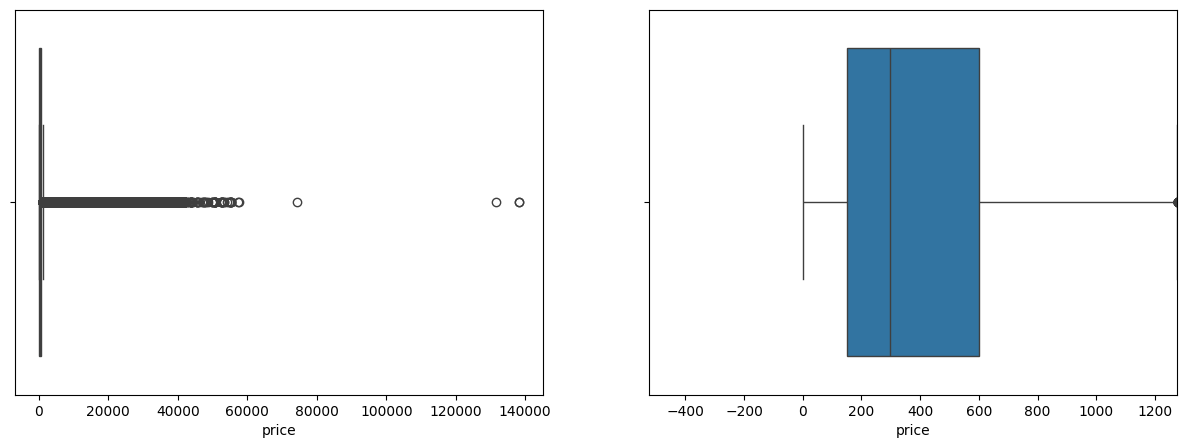

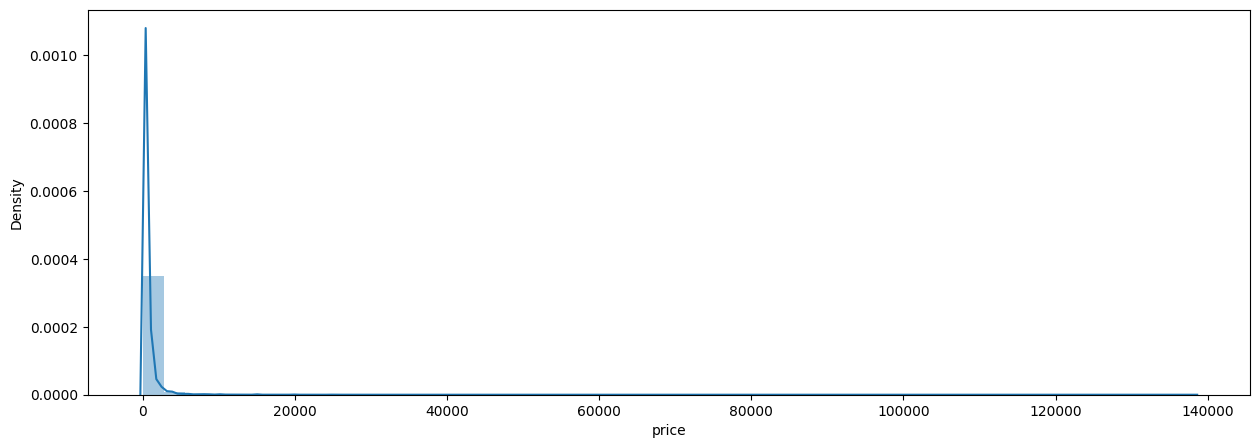

In [13]:
box_diagram(base_airbnb['price'])
histogram(base_airbnb['price'])

Since we are building a model for typical properties, I believe that values above the upper limit will likely be only for extremely luxury apartments, which is not our main focus. Therefore, we can exclude these outliers.

In [14]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'price')
print('{} removed rows'.format(removed_rows))

87282 removed rows


C:\Users\gabri\AppData\Local\Temp\ipykernel_14132\3249714847.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


(810427, 23)


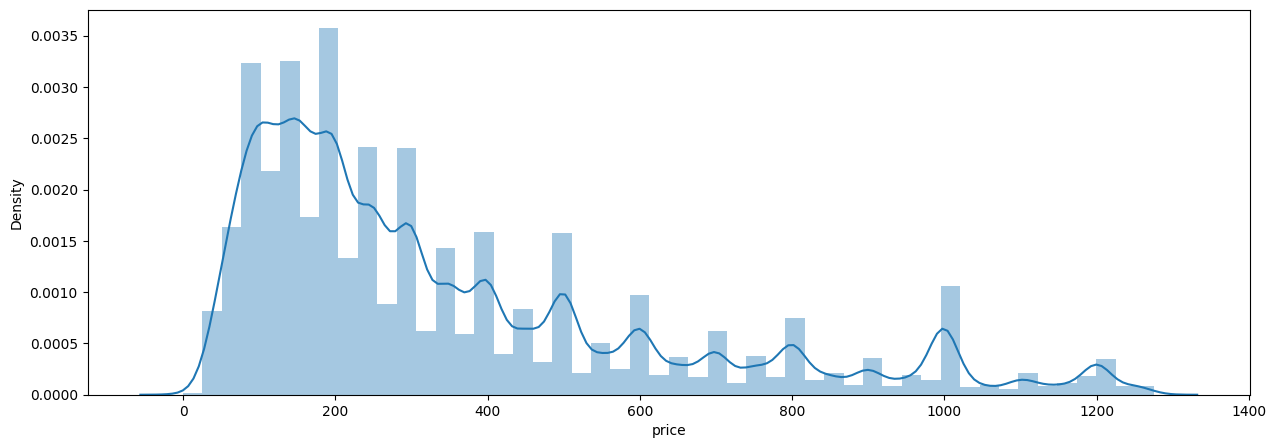

In [15]:
histogram(base_airbnb['price'])
print(base_airbnb.shape)

## extra_people

C:\Users\gabri\AppData\Local\Temp\ipykernel_14132\3249714847.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


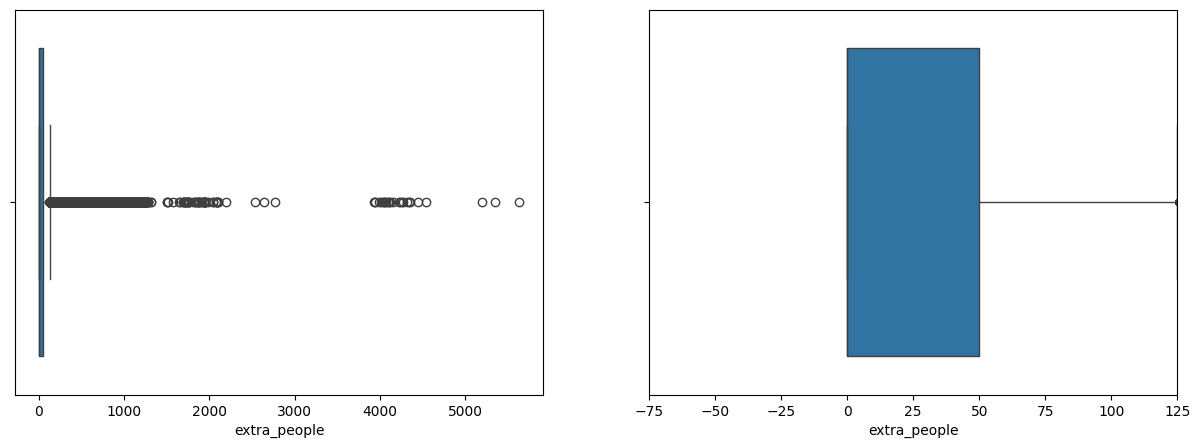

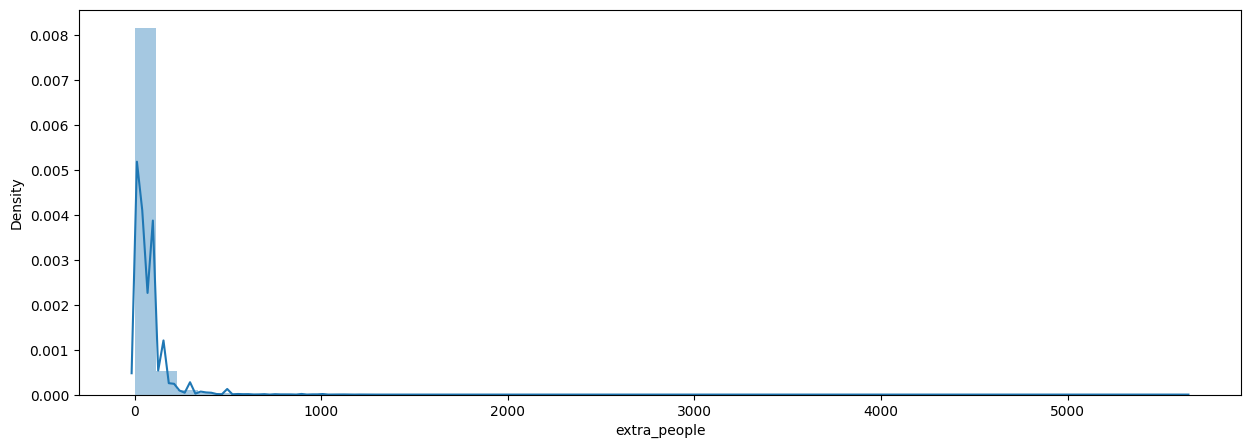

In [16]:
box_diagram(base_airbnb['extra_people'])
histogram(base_airbnb['extra_people'])

In [17]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'extra_people')
print('{} removed rows'.format(removed_rows))

59194 removed rows


C:\Users\gabri\AppData\Local\Temp\ipykernel_14132\3249714847.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


(751233, 23)


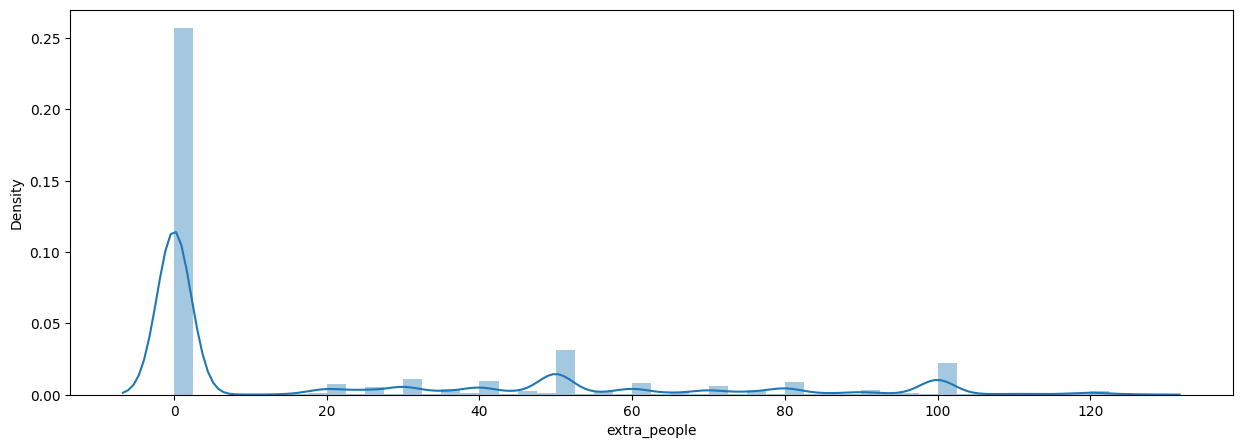

In [18]:
histogram(base_airbnb['extra_people'])
print(base_airbnb.shape)

### host_listings_count

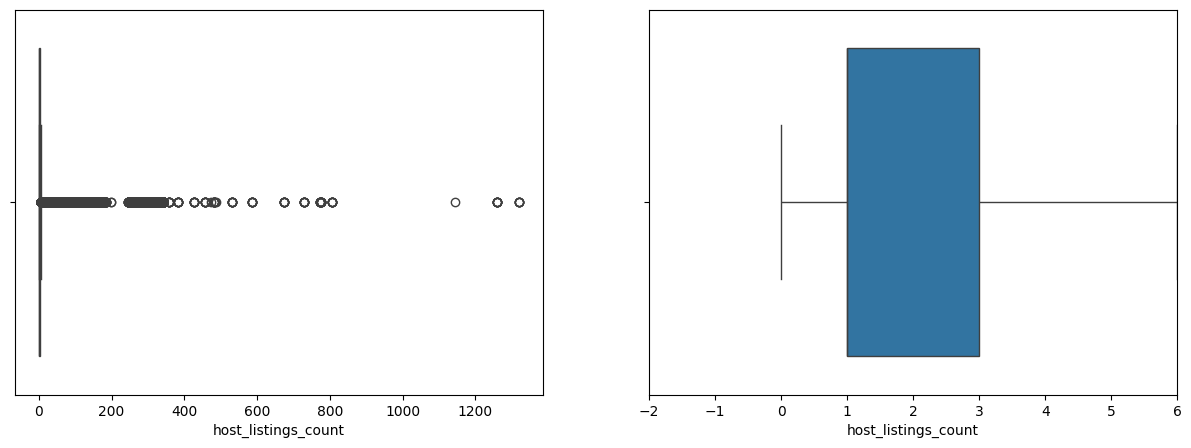

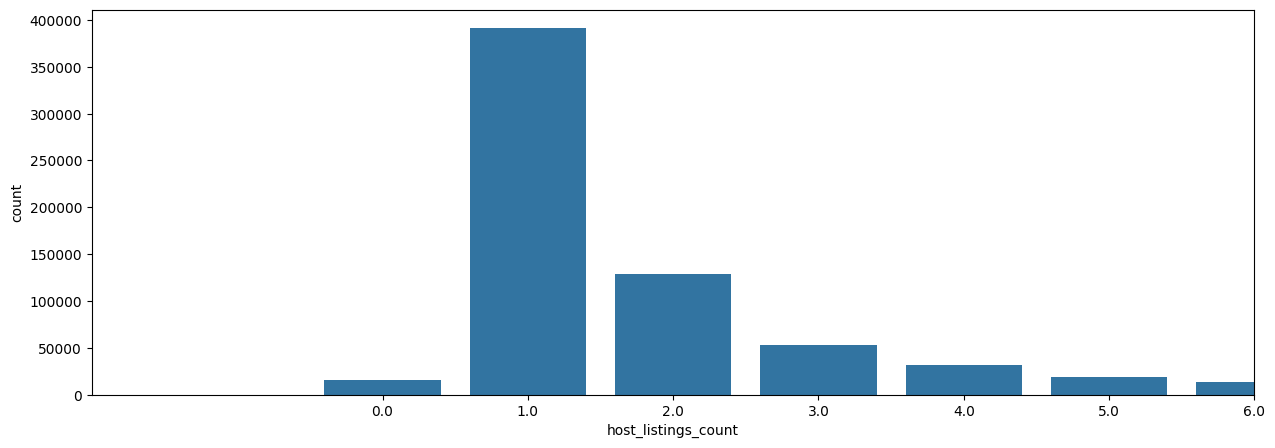

In [19]:
box_diagram(base_airbnb['host_listings_count'])
bar_plot(base_airbnb['host_listings_count'])

We can exclude the outliers because, for the objective of our project, hosts with more than 6 properties on Airbnb are not the target audience (they are likely real estate agencies or professionals managing multiple properties on Airbnb).

In [20]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'host_listings_count')
print('{} removed rows'.format(removed_rows))

97723 removed rows


### accommodates

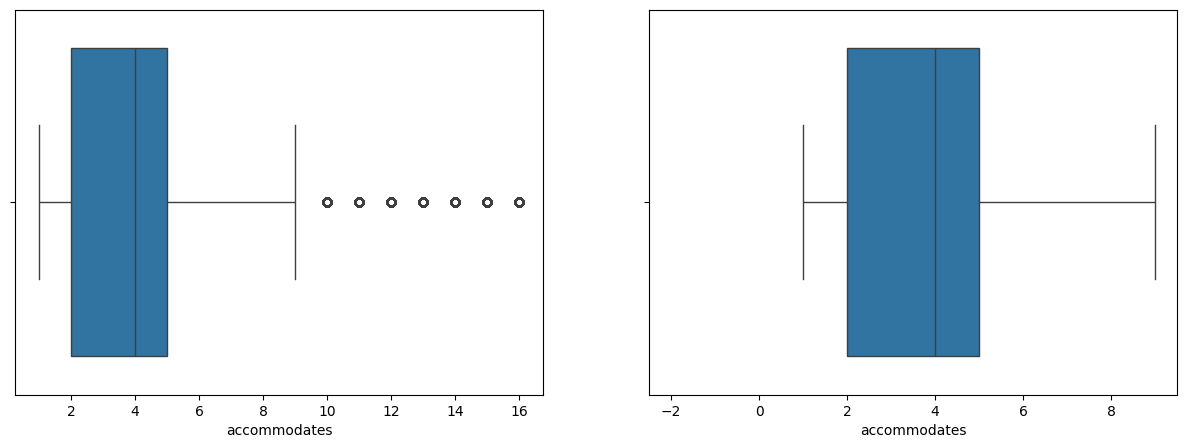

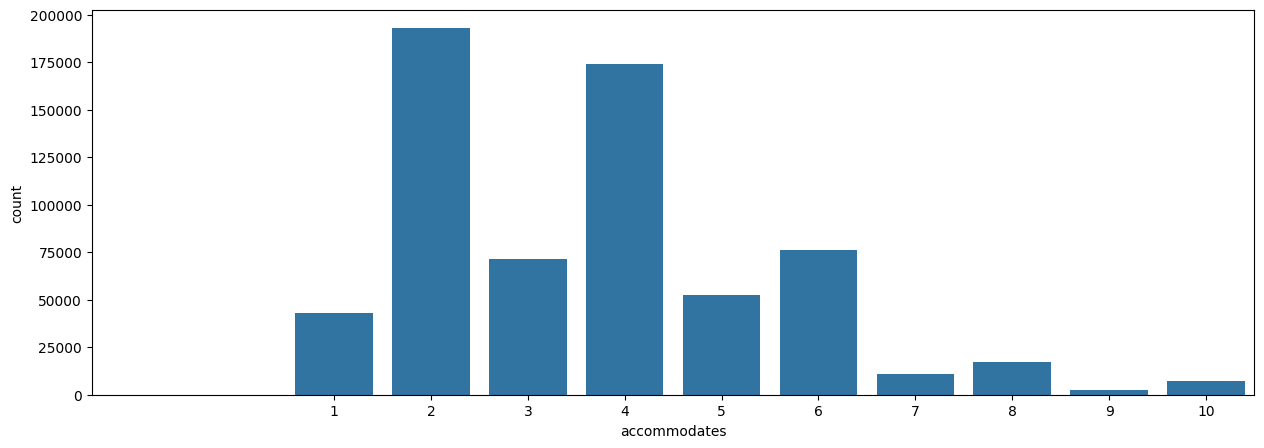

In [21]:
box_diagram(base_airbnb['accommodates'])
bar_plot(base_airbnb['accommodates'])

- For the same reason as with "host_listings_count," we will exclude the outliers in this column because apartments that accommodate more than 9 people are not our focus. Our goal here is for typical properties.

- If we wanted to include high-end apartments, we could either keep this variable or build a separate model specifically focused on properties accommodating more than 9 guests.

In [22]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'accommodates')
print('{} removed rows'.format(removed_rows))

13146 removed rows


### bathrooms / bedrooms / beds

- For the same reason as the previous cases, we will exclude the outliers in the bathrooms/bedrooms/beds columns.

In [23]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'bathrooms')
print('{} removed rows'.format(removed_rows))

6894 removed rows


In [24]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'bedrooms')
print('{} removed rows'.format(removed_rows))

5482 removed rows


In [25]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'beds')
print('{} removed rows'.format(removed_rows))

5622 removed rows


### guests_included

(1.0, 1.0)


<Axes: xlabel='guests_included', ylabel='count'>

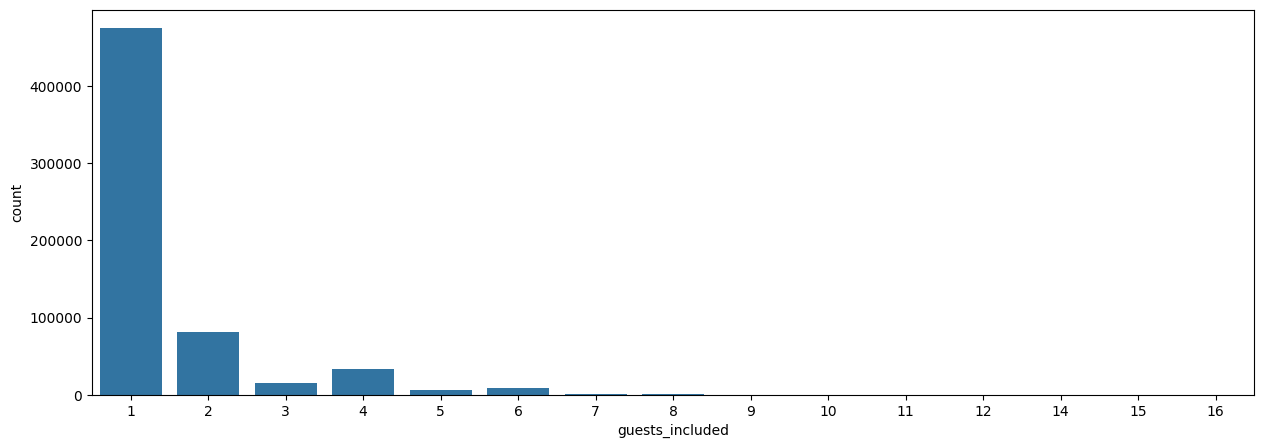

In [26]:
#box_diagram(base_airbnb['guests_included'])
#bar_plot(base_airbnb['guests_included'])
print(limits(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

We are going to remove this feature from the analysis. It seems that Airbnb users often use the default value of 1 guest included, which could lead our model to consider a feature that is actually not essential for determining the price. Therefore, it seems better to exclude this column from the analysis.

In [27]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

### minimum_nights

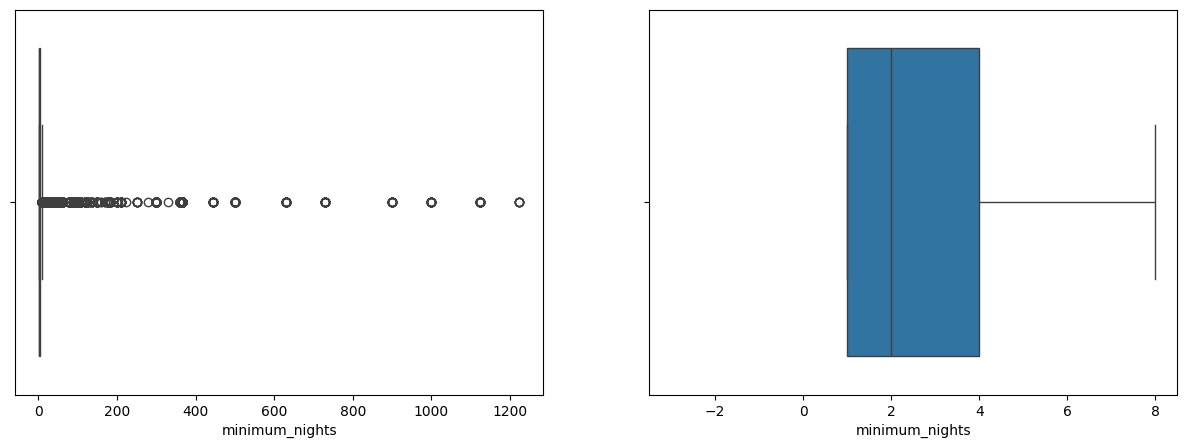

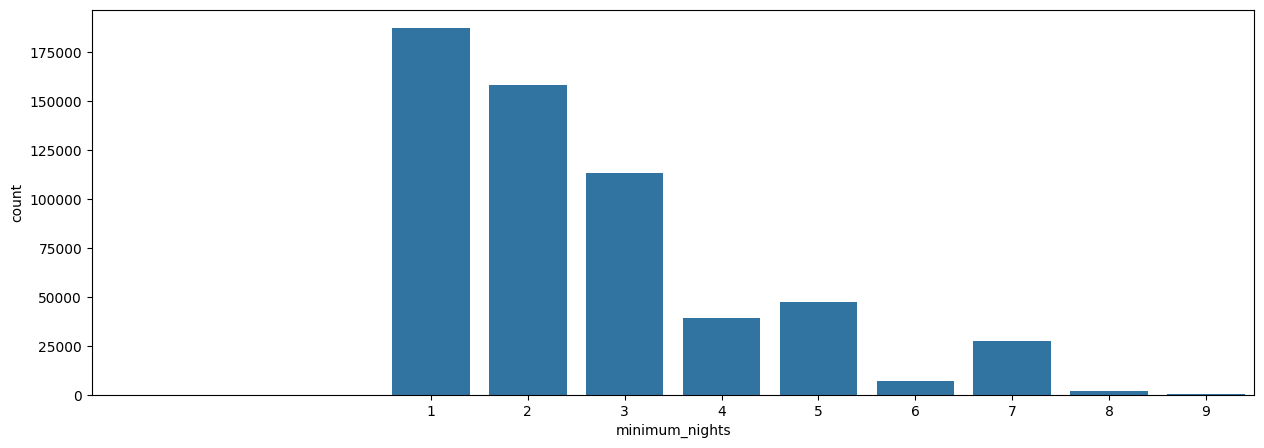

In [28]:
box_diagram(base_airbnb['minimum_nights'])
bar_plot(base_airbnb['minimum_nights'])

- Here we have an even stronger reason to exclude these apartments from the analysis.

- We want a model that helps price typical apartments as an average person would list. Apartments with more than 8 nights as the "minimum stay" might be seasonal rentals or apartments for long-term stays, where the host requires a minimum of 1 month in the apartment.

- Therefore, we will exclude the outliers in this column.

In [29]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'minimum_nights')
print('{} removed rows'.format(removed_rows))

40383 removed rows


### maximum_nights

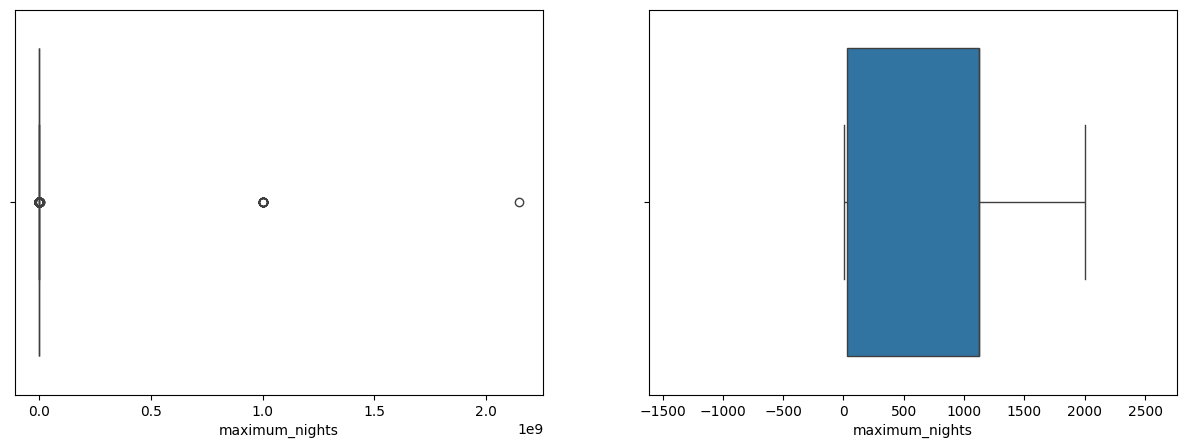

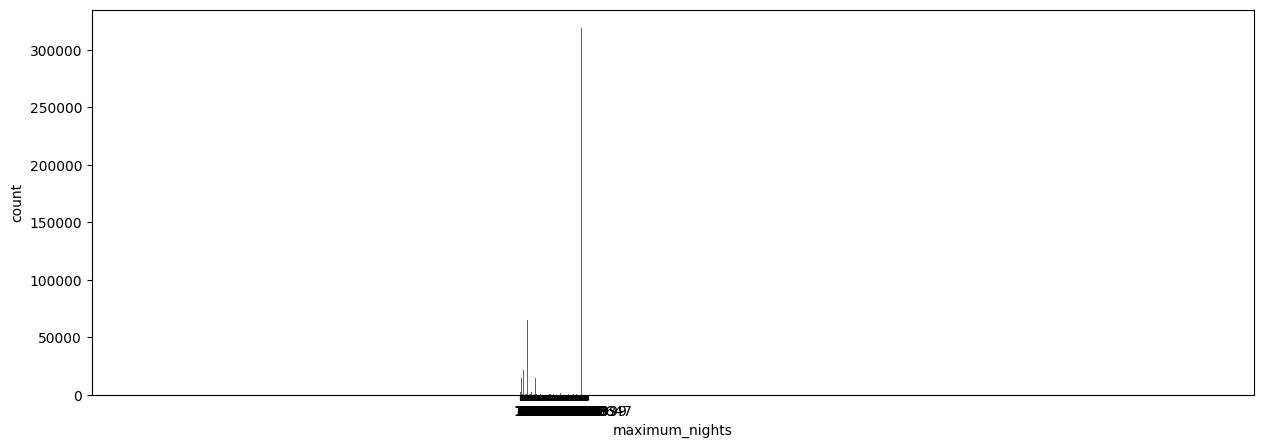

In [30]:
box_diagram(base_airbnb['maximum_nights'])
bar_plot(base_airbnb['maximum_nights'])

- This column does not seem to contribute to the analysis.

- This is because it appears that almost all hosts do not fill in the "maximum nights" field, so it does not seem to be a relevant factor.

- It is better to exclude this column from the analysis.

In [31]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

### number_of_reviews            

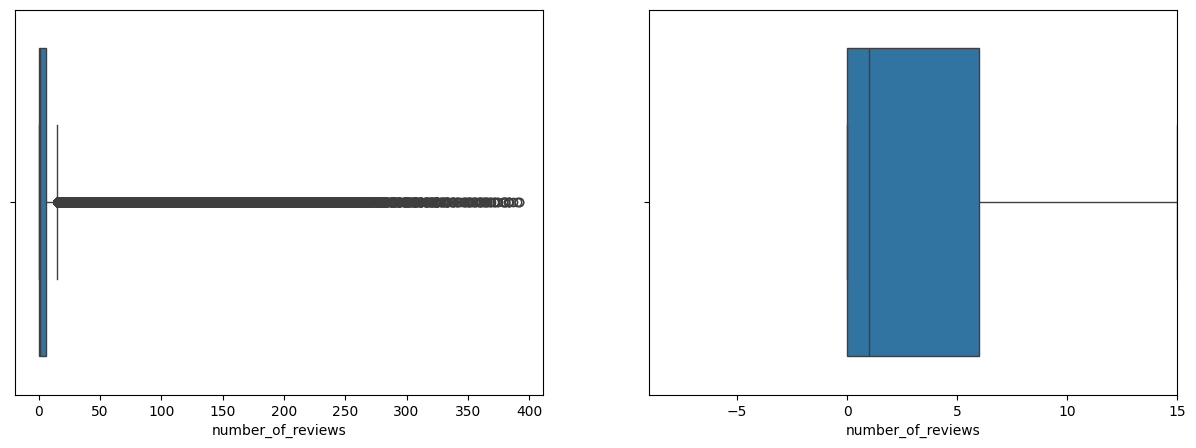

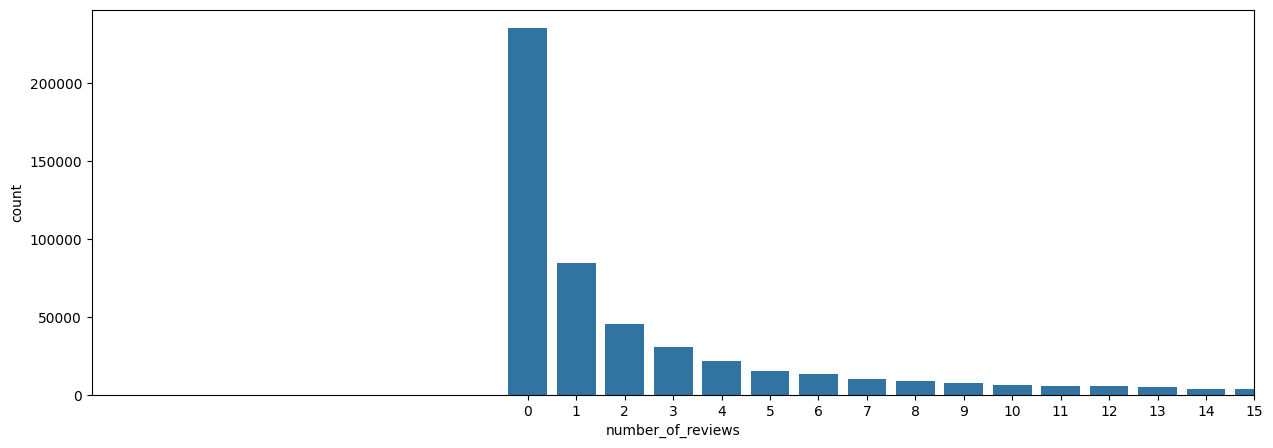

In [32]:
box_diagram(base_airbnb['number_of_reviews'])
bar_plot(base_airbnb['number_of_reviews'])

- Here we could make some different decisions. I will decide to remove this feature from the analysis based on my personal analysis, for several reasons:

    1. If we exclude outliers, we will exclude people with the highest number of reviews (who are usually hosts with more rentals). This could negatively impact our model significantly.
    2. Considering our goal, if I have a vacant property and want to list it, it's clear that I wouldn't have any reviews. Therefore, removing this feature from the analysis might actually be beneficial.
    3. Personally, I am unsure if this feature should affect the final price or not.

In [33]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

### Treating Text Columns

### - property_type 

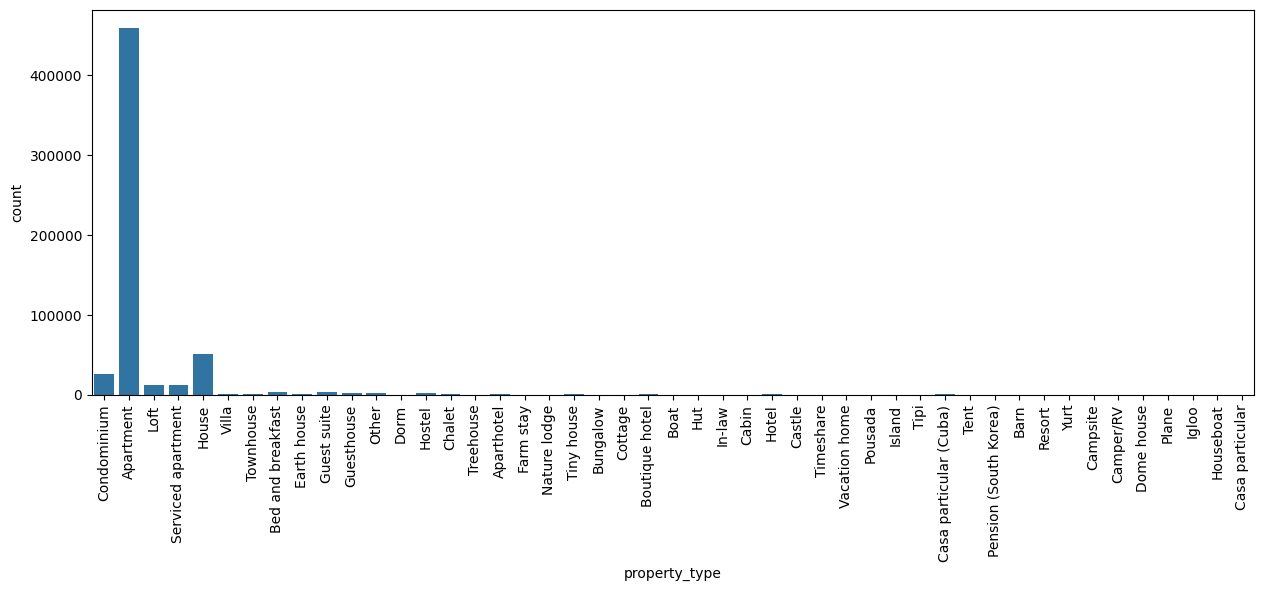

In [34]:
plt.figure(figsize=(15,5))
graphic =sns.countplot(x=base_airbnb['property_type'])
graphic.tick_params(axis='x', rotation=90)

- Here, our action is not to "exclude outliers," but rather to group values that are very small.

- All property types with fewer than 2,000 properties in the dataset will be grouped into a category called "others." I believe this will simplify our model.

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Others                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


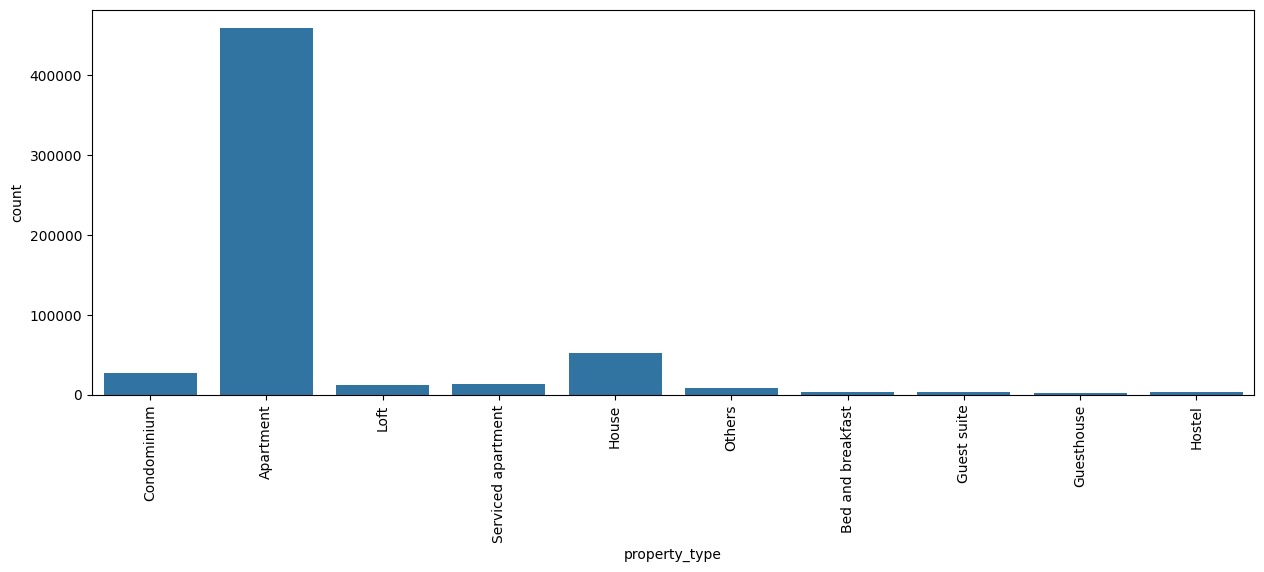

In [35]:
table_property_types = base_airbnb['property_type'].value_counts()

group_columns = [type for type in table_property_types.index if table_property_types[type] < 2000]

print(group_columns)

for type in group_columns:
    base_airbnb.loc[base_airbnb['property_type']==type, 'property_type'] = 'Others'

print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
graphic =sns.countplot(x=base_airbnb['property_type'])
graphic.tick_params(axis='x', rotation=90)

### - room_type 

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


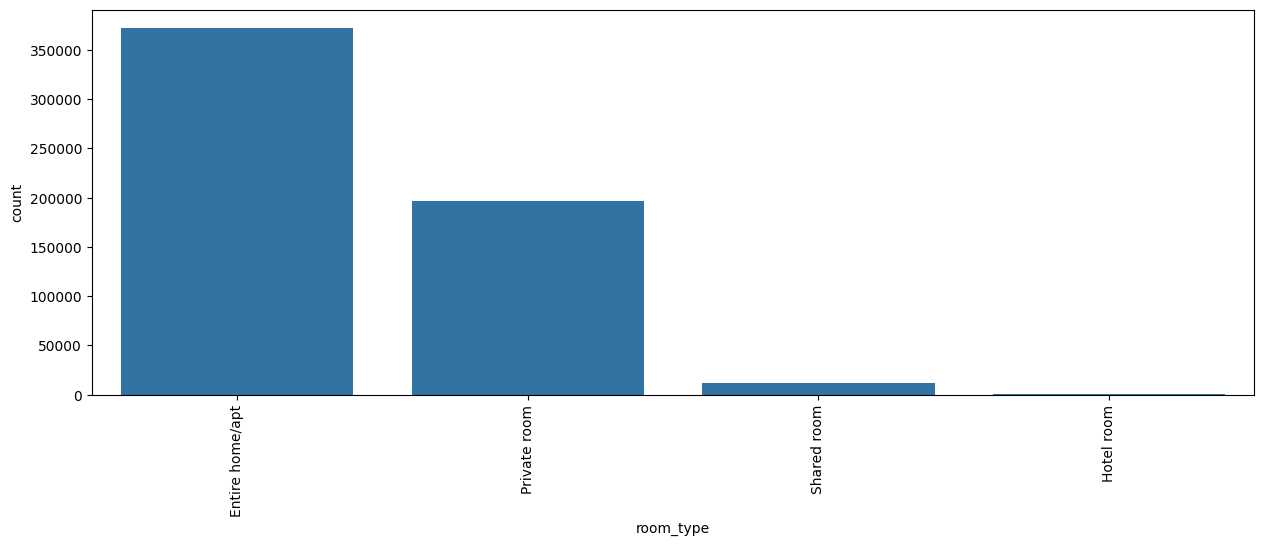

In [36]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
graphic = sns.countplot(x=base_airbnb['room_type'])
graphic.tick_params(axis='x', rotation=90)

- For the room type, we don't need to take any action as it appears to be well-distributed.

### - bed_type 

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


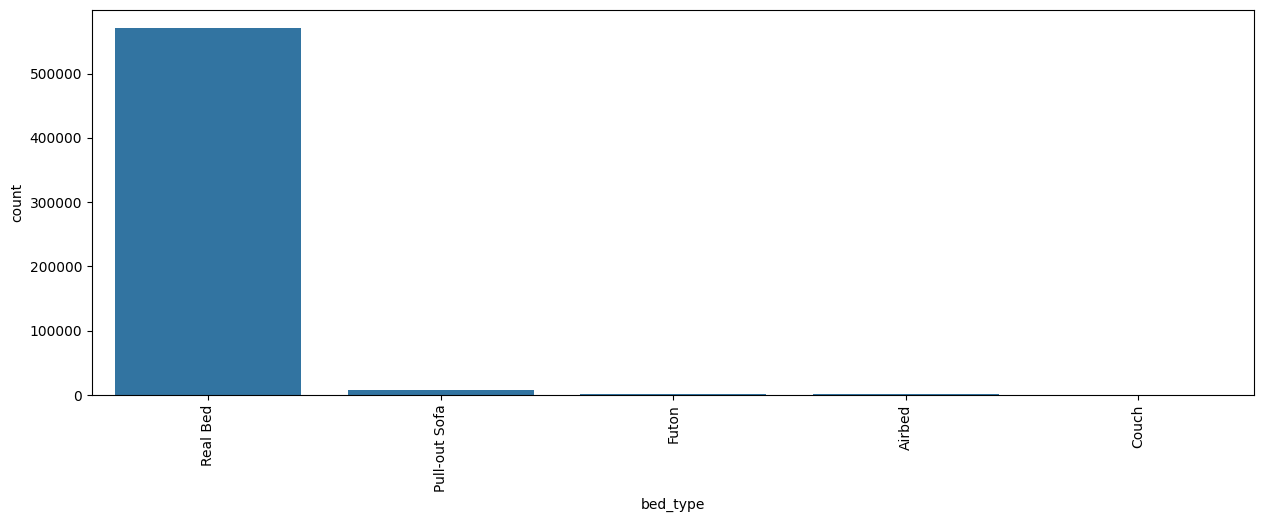

In [37]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
graphic = sns.countplot(x = base_airbnb['bed_type'])
graphic.tick_params(axis='x', rotation=90)

- Since we have one value that is clearly MUCH higher than all the others, I will create only 2 groups for beds: "Real Bed" and "Others."

This will simplify the model.

bed_type
Real Bed    570643
Others       11340
Name: count, dtype: int64


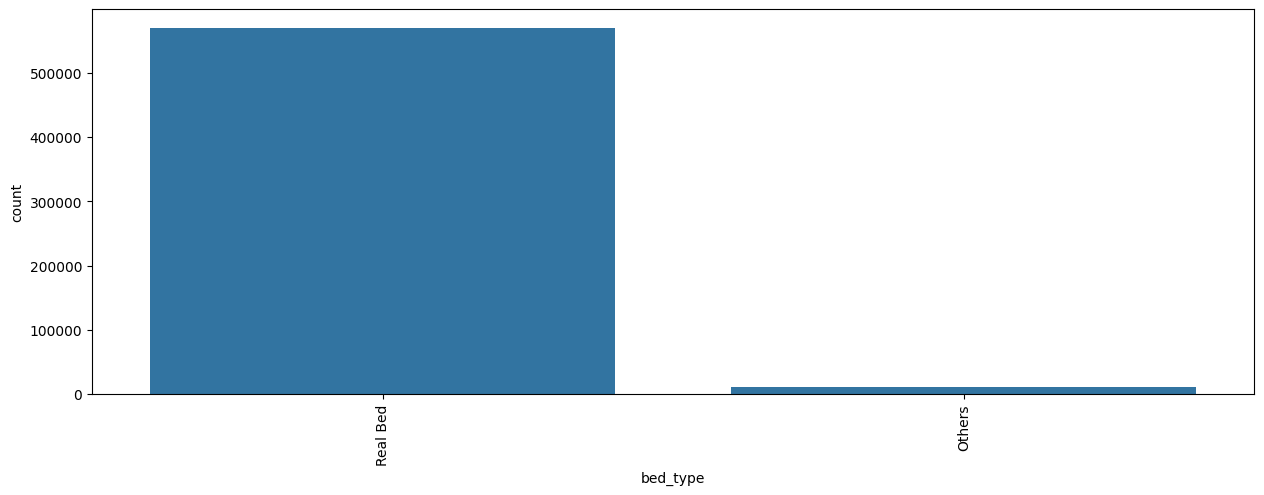

In [38]:
# grouping the categories of bed_type
table_bed = base_airbnb['bed_type'].value_counts()

group_columns = [type for type in table_bed.index if table_bed[type] < 10000]

for type in group_columns:
    base_airbnb.loc[base_airbnb['bed_type']==type, 'bed_type'] = 'Others'

print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
graphic = sns.countplot(x = base_airbnb['bed_type'])
graphic.tick_params(axis='x', rotation=90)

### - cancellation_policy 

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64


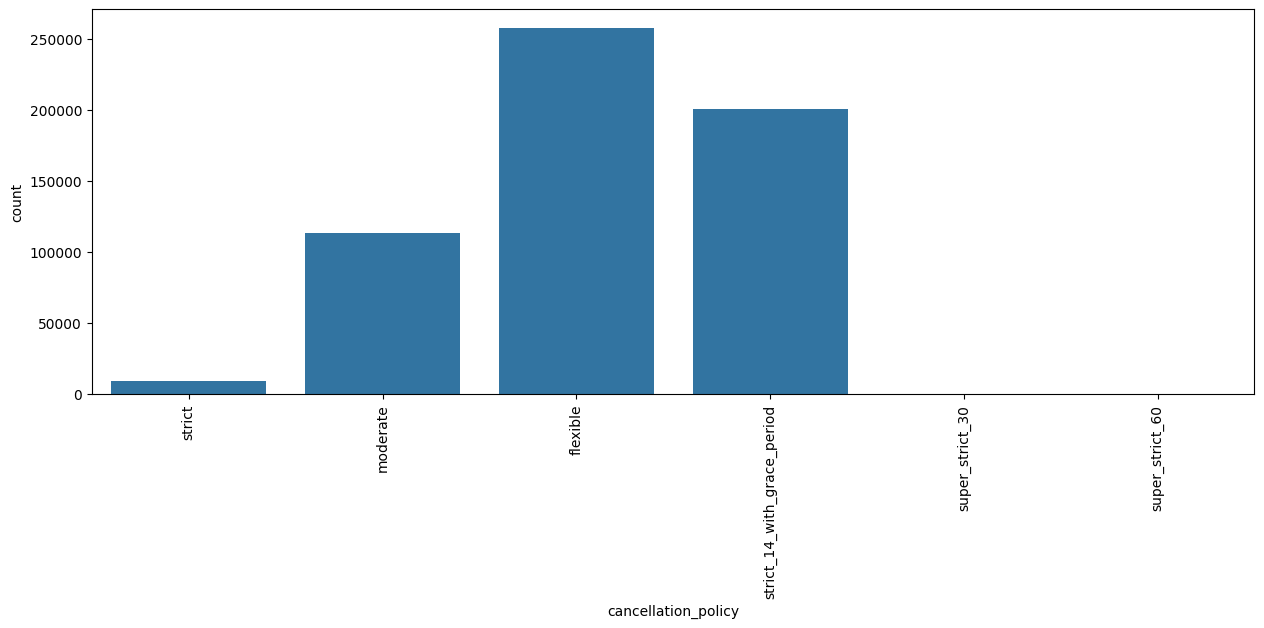

In [39]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
graphic = sns.countplot(x = base_airbnb['cancellation_policy'])
graphic.tick_params(axis='x', rotation=90)

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


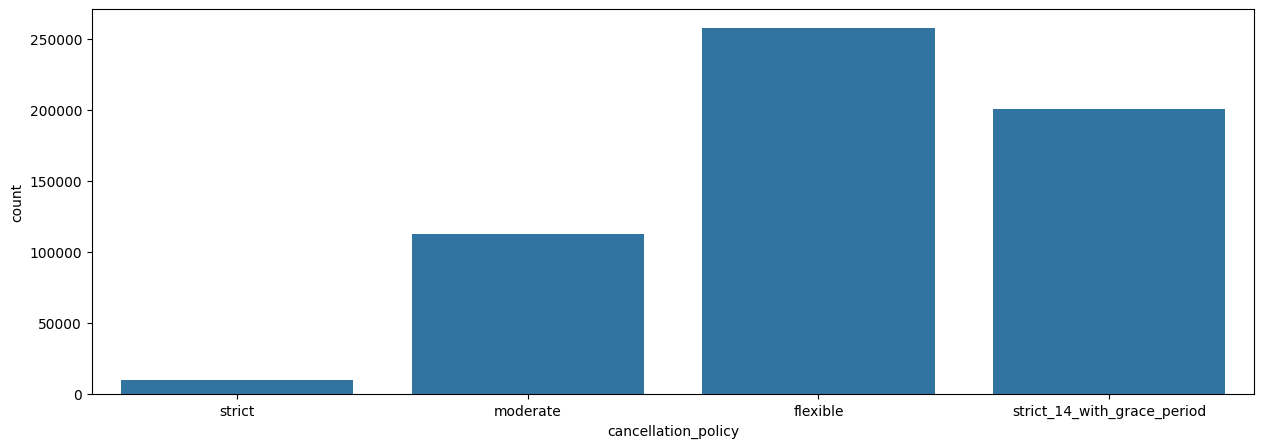

In [40]:
# grouping the categories of cancellation_pollicy
table_cancellation = base_airbnb['cancellation_policy'].value_counts()

group_columns = [type for type in table_cancellation.index if table_cancellation[type] < 10000]

for tipo in group_columns:
    base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
graphic =sns.countplot(x=base_airbnb['cancellation_policy'])
graphic.tick_params(axis='x', rotation=0)

### - amenities 

Since we have a wide variety of amenities, and sometimes the same amenities can be written differently, we will instead use the number of amenities as the parameter for our model.

In [41]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [42]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581983, 20)

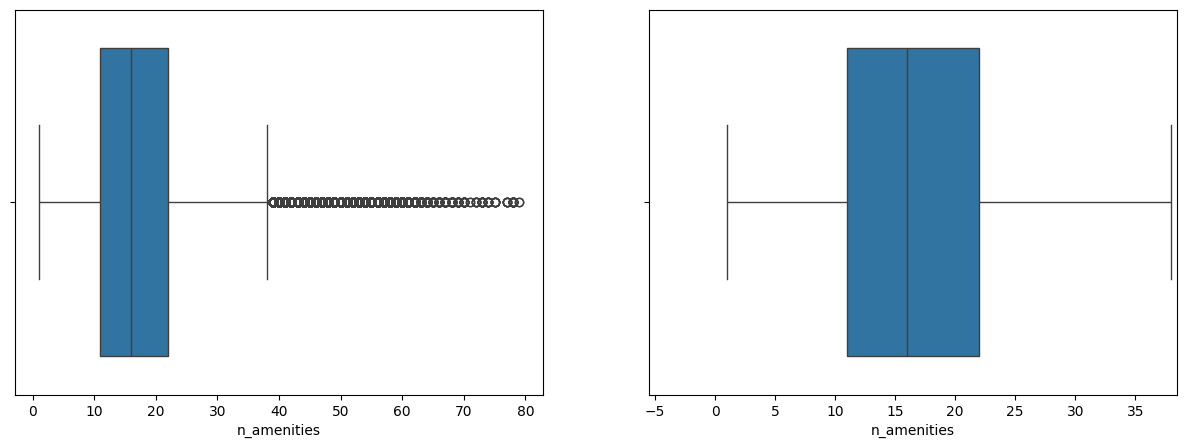

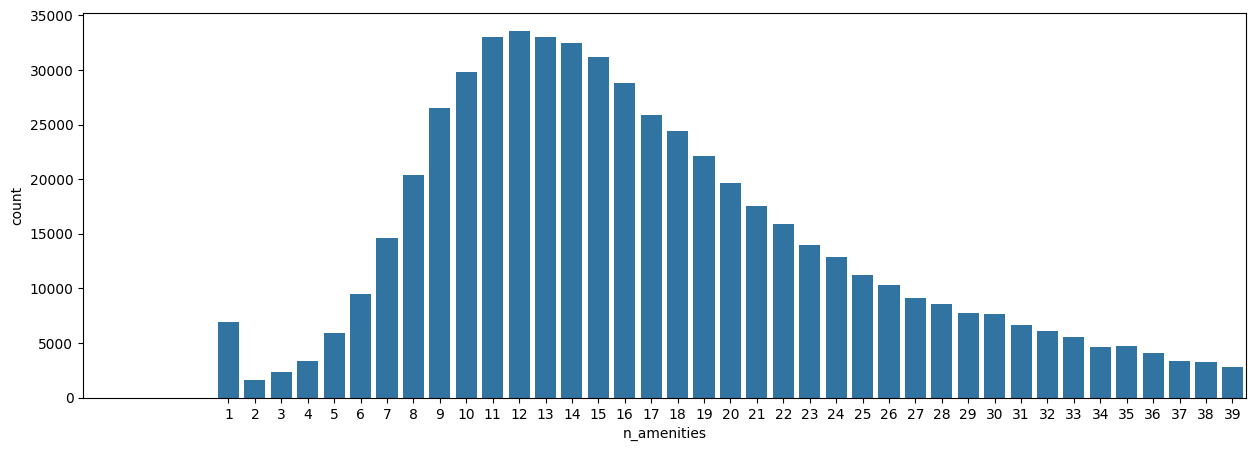

In [43]:
box_diagram(base_airbnb['n_amenities'])
bar_plot(base_airbnb['n_amenities'])

So, this became a numerical value column, and like all other numerical value columns, I excluded outliers using the same methods as before.

In [44]:
base_airbnb, removed_rows = exclude_outliers(base_airbnb, 'n_amenities')
print('{} removed rows'.format(removed_rows))

24343 removed rows


### Map Visualization of Properties

We will create a map that displays a random sample of our dataset (50,000 properties) to see how the properties are distributed across the city and to identify areas with higher prices.

In [59]:
sample = base_airbnb.sample(n=50000)
map_center = {'lat':sample.latitude.mean(), 'lon':sample.longitude.mean()}
map = px.density_mapbox(sample, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=map_center, zoom=10,
                        mapbox_style='open-street-map',
                        opacity = 0.5)
map.show()

### Encoding

We need to adjust the features to make it easier for the future model (categorical features, true/false values, etc.).

- For True/False value features, we will replace True with 1 and False with 0.
- For categorical features (where the column values are text), we will use the dummy variable encoding method.

In [46]:
columns_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for column in columns_tf:
    base_airbnb_cod.loc[base_airbnb_cod[column]=='t', column] = 1
    base_airbnb_cod.loc[base_airbnb_cod[column]=='f', column] = 0

In [47]:
columns_categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=columns_categories)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                       True                False                  False   
3                       True                False                  False   
4                       True                False                  False   
5                       True                False                  False   
6                       True                False                  False   

   room_type_Shared room  bed_type_Others  bed_type_Real Bed  \
1                  False            False               True   
3                  False            False               True   
4                  False            False               True   
5                  False            False               True   
6                  False            False               True   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                         False                         False   
3                         False                         False   
4                         False                         False   
5                         False                         False   
6                         False                         False   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                        True                                            False  
3                        True                                            False  
4                        True                                            False  
5                        True                                            False  
6                        True                                            False  

[5 rows x 36 columns]

### Prediction Model

- Evaluation Metrics
Here, we will use R², which will tell us how well our model can explain the price. This would be a great parameter to assess the quality of our model. <br>
-> The closer to 100%, the better.

I will also calculate the Mean Squared Error (MSE), which will show us how much our model is off. <br>
-> The smaller the error, the better.

In [48]:
def evaluate_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    RMSE = np.sqrt(mean_squared_error(y_test, prediction))
    return f'Model {model_name}:\nR²:{r2:.2%}\nRMSE:{RMSE:.2f}'

- Choosing the Models to Be Tested
    1. RandomForest
    2. LinearRegression
    3. Extra Tree
    
Predicting numerical values is a task known as regression. In fact, there are dozens, if not hundreds, of different models of regression to choose from.

In [49]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et,
          }

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

- Splitting the Data into Training and Testing Sets + Model Training

This step is crucial. Artificial Intelligences learn through what we call training.

Basically, what we do is split the data into training and testing sets, for example: 10% of the dataset will be used for testing and 90% for training (training data is typically the larger portion).

Then, we give the training data to the model, which will look at those data and learn to predict the prices.

After it learns, we test it using the testing data to see how well it performs. By analyzing the test data, you can determine the best model.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for model_name, model in models.items():
    #train
    model.fit(X_train, y_train)
    #test
    prediction = model.predict(X_test)
    print(evaluate_model(model_name, y_test, prediction))

Model RandomForest:
R²:97.23%
RMSE:44.11
Model LinearRegression:
R²:32.70%
RMSE:217.54
Model ExtraTrees:
R²:97.51%
RMSE:41.84


### Analysis of the Best Model

- Chosen Best Model: ExtraTreesRegressor

This model had the highest R² value and, at the same time, the lowest RMSE value. Since there wasn't a significant difference in training and prediction speed between this model and the RandomForest model (which had similar R² and RMSE results), we decided to choose the ExtraTrees model.

The linear regression model did not perform well, with R² and RMSE values significantly worse than the other two models.


### Adjustments and Improvements to the Best Model

0
bedrooms                                         0.118128
latitude                                         0.104132
longitude                                        0.101365
n_amenities                                      0.088272
extra_people                                     0.086574
bathrooms                                        0.070970
room_type_Entire home/apt                        0.068774
accommodates                                     0.064886
minimum_nights                                   0.064606
beds                                             0.053013
host_listings_count                              0.039822
instant_bookable                                 0.022046
cancellation_policy_flexible                     0.019450
host_is_superhost                                0.013803
property_type_Apartment                          0.012895
cancellation_policy_moderate                     0.012258
year                                             0.011327
cancellation_policy_strict_14_with_grace_period  0.007759
property_type_House                              0.007024
property_type_Condominium                        0.005216
month                                            0.004703
room_type_Private room                           0.004199
bed_type_Real Bed                                0.002750
bed_type_Others                                  0.002682
property_type_Others                             0.002412
property_type_Serviced apartment                 0.002302
property_type_Loft                               0.002086
room_type_Shared room                            0.001859
property_type_Bed and breakfast                  0.001293
property_type_Guesthouse                         0.000948
cancellation_policy_strict                       0.000837
property_type_Guest suite                        0.000651
property_type_Hostel                             0.000634
room_type_Hotel room                             0.000322
is_business_travel_ready                         0.000000

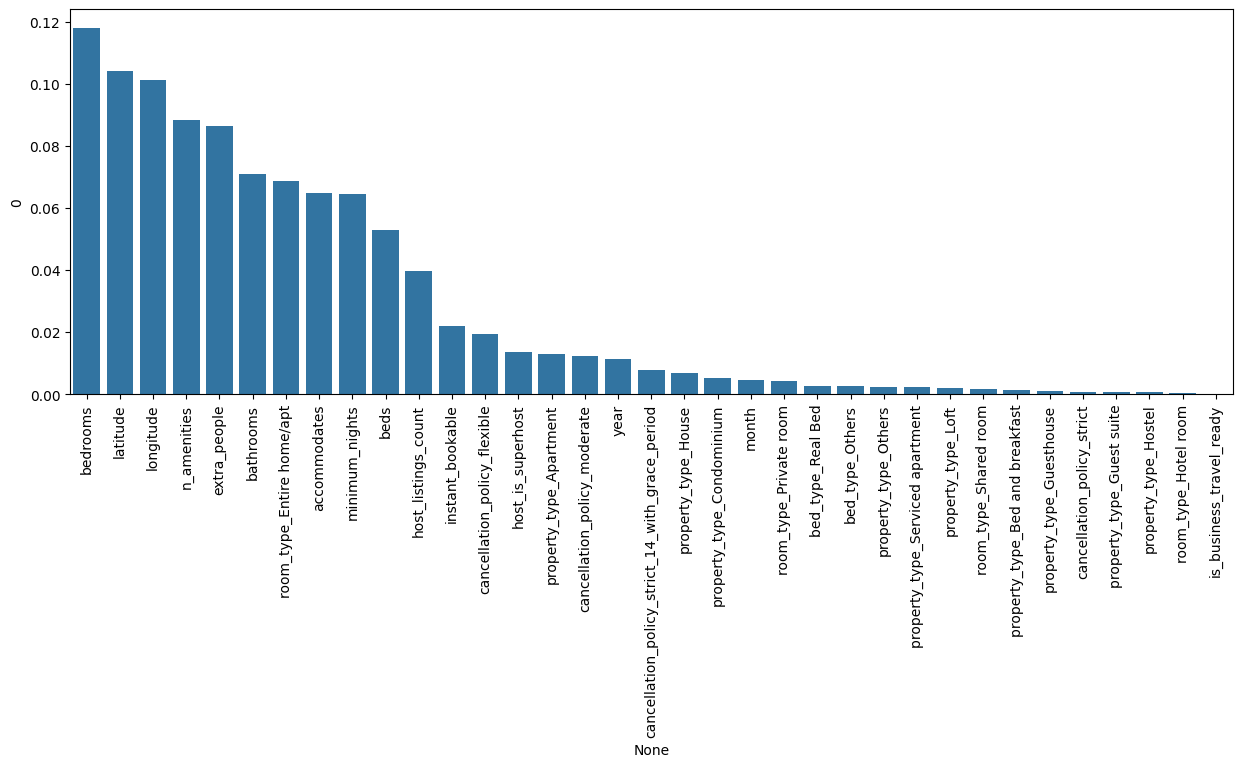

In [51]:
#print(model_et.feature_importances_)
#print(X_train.columns)
feature_importance = pd.DataFrame(model_et.feature_importances_, X_train.columns)
feature_importance = feature_importance.sort_values(by=0, ascending=False)
display(feature_importance)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=feature_importance.index, y=feature_importance[0])
ax.tick_params(axis='x', rotation=90)

- is_business_travel_ready doesn't seem to have much impact on our model. Therefore, to simplify the model, we will exclude this feature and test the model without it.

In [52]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model_et.fit(X_train, y_train)
prediction = model_et.predict(X_test)
print(evaluate_model('ExtraTrees', y_test, prediction))

Model ExtraTrees:
R²:97.50%
RMSE:41.95


In [53]:
base_test = base_airbnb_cod.copy()
for column in base_test:
    if 'bed_type' in column:    
        base_test = base_test.drop(column, axis=1)
print(base_test.columns)

y = base_test['price']
X = base_test.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model_et.fit(X_train, y_train)
prediction = model_et.predict(X_test)
print(evaluate_model('ExtraTrees', y_test, prediction))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'year', 'month',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Others', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Model ExtraTrees:
R²:97.49%
RMSE:41.99


# Project Deploy

- Step 1 -> Create Model File (joblib)<br>
- Step 2 -> Choose the deployment method:
    - Executable File + Tkinter
    - Deploy on Microsite (Flask)
    - Deploy for direct use (Streamlit)
- Step 3 -> Another Python file (can be Jupyter or PyCharm)
- Step 4 -> Import Streamlit and create code
- Step 5 -> Assign model loading to a button
- Step 6 -> Deployment complete

In [55]:
X['price'] = y
X.to_csv('data.csv')

In [56]:
import joblib
joblib.dump(model_et, 'model.joblib')

['model.joblib']